<a href="https://colab.research.google.com/github/rmynzl/calismalarim/blob/main/R%C3%BCmeysa_Nazli_234329040_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive

# Google Drive
drive.mount('/content/drive')

# Dosya yolunu belirtin
dosya_yolu = '/content/drive/MyDrive/book.txt'  # Dosya yolu

# Dosyayı okutma
with open(dosya_yolu, 'r') as dosya:
    book = dosya.read()

# Veriyi yazdırma
print(book)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
UĞULTULU TEPELER
   I   
1801
İnsanlardan kaçan komşumu ve daha sonra başıma bir sürü  
iş açacak olan mal sahibimi ziyaretten yeni döndüm. Doğruyu  
söylemek  gerekirse  oraları  gerçekten  güzel   yerlerdi!
İngiltere’de gürültüden bu kadar uzak başka bir yer daha  
olabileceğini hiç sanmıyorum. İnsanlardan kaçan ya da nefret  
eden biri için adeta cennet gibi bir yer... Doğrusu  bu  
sessizliği paylaşacak  Bay Heathcliff’le benden daha uygun  
hiç kimse yoktur. Bay Heathcliff çok sevimli bir adam.  
Atımın üstünde ona doğru yaklaşırken  simsiyah gözlerinin  
kuşkuyla kısıldığını fark ediyordum. Kendimi ona tanıtırken  
de  parmaklarını inatçı bir çekingenlikle  yeleğinin içine  
doğru kaçırdığını gördüğüm zaman  kendisine karşı nasıl bir  
yakınlık duyduğumun farkına bile varmadı sanırım.  
“Bay Heathcliff!” dedim.  
Sadece başını eğerek tepkisini gösterdi.

In [ ]:
def kelime_sayisi(book):
    # Metni boşluklara göre böler ve kelime listesi oluşturur
    kelimeler = book.split()
    # Kelime sayısını döndürür
    return len(kelimeler)

# Metindeki toplam kelime sayısını hesaplayalım
toplam_kelime_sayisi = kelime_sayisi(book)

# Sonucu yazdıralım
print("Toplam Kelime Sayısı:", toplam_kelime_sayisi)

Toplam Kelime Sayısı: 92475


In [ ]:
import string
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


def clean_text(book):
    # Sayıları, özel karakterleri, Türkçe karakterleri ve boşlukları kaldıralım
    book = re.sub(r'\d+', '', book)  # Sayıları kaldıralım
    book = re.sub(r'[^\w\s]', '', book)  # Özel karakterleri kaldıralım
    book = re.sub(r'[^\x00-\x7FğüşıöçĞÜŞİÖÇ\s]', '', book)  # Türkçe karakterleri kaldıralım
    book = book.strip()  # Başta ve sonda kalan boşlukları kaldıralım

    # Küçük harfe dönüştürelim
    book = book.lower()

    # Sistemdeki stop words'leri yükleyelim
    system_stopwords = set(stopwords.words("turkish"))

    # Kendi stop words listem
    custom_stopwords = set(["bir", "diğer", "değil","yok","bütün","gibi", "ben","doğru","bay","bayan","içinde","başka","bile","beni","bana","bize","biz","böyle","öyle","sizi","size","siz","bizim","sizin","i","de","da","bu","için","diye","daha","ki","ama","onu","ona","çok","şey","şeyle","ha","dedi","mi","onun","kadar","sonra","sen","olduğu","olmak","olduğunu","benim","dedim","senin","kendi","kendim","seni","hemen","artık","biraz","cevap","verdi","kız","bir","iki","var","tek","şimdi","bunu","sana","gün","önce","hiçbir"])  # Örnek stop words listesi

    # Tüm stop words'leri birleştirelim
    all_stopwords = system_stopwords.union(custom_stopwords)

    # Stop words'leri kaldıralım
    words = book.split()
    words = [word for word in words if word not in all_stopwords]
    book = ' '.join(words)

    return book

cleaned_text = clean_text(book)
print("Cleaned Text:\n", cleaned_text)

Cleaned Text:
 uğultulu tepeler i̇nsanlardan kaçan komşumu başıma sürü iş açacak olan mal sahibimi ziyaretten yeni döndüm doğruyu söylemek gerekirse oraları gerçekten güzel yerlerdi i̇ngilterede gürültüden uzak yer olabileceğini sanmıyorum i̇nsanlardan kaçan nefret eden adeta cennet yer doğrusu sessizliği paylaşacak heathcliffle benden uygun kimse yoktur heathcliff sevimli adam atımın üstünde yaklaşırken simsiyah gözlerinin kuşkuyla kısıldığını fark ediyordum kendimi tanıtırken parmaklarını inatçı çekingenlikle yeleğinin içine kaçırdığını gördüğüm zaman kendisine karşı yakınlık duyduğumun farkına varmadı sanırım heathcliff sadece başını eğerek tepkisini gösterdi yeni kiracınız lockwood efendim gelir gelmez ziyaret etmekten onur duyuyorum nedenle thrushcross grangee yerleşme konusunda gösterdiğim ısrarlı aceleci tavrımla rahatsız edip etmediğimi öğrenmek istedim dün duyduğuma göre konuda kuşkularınız yüzünü buruşturarak thrushcross grange mülkümdür bayım sözümü kesti elim ayağım tuttuğu

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def kelime_sayisi(cleaned_text):
    # Metni boşluklara göre böler ve kelime listesi oluşturur
    kelimeler2 = cleaned_text.split()
    # Kelime sayısını döndürür
    return len(kelimeler2)

# Temizlenmiş metindeki kelime sayısını hesaplar
temizlenmis_kelime_sayisi = kelime_sayisi(cleaned_text)

# Sonucu yazdır
print("Temizlenmiş Metindeki Kelime Sayısı:", temizlenmis_kelime_sayisi)


Temizlenmiş Metindeki Kelime Sayısı: 64424


In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def tokenize_text(cleaned_text):
    # Metni kelimelere ayıralım (tokenize etme)
    tokens = word_tokenize(cleaned_text)
    return tokens

# Token'lara bakalım
tokens = tokenize_text(cleaned_text)
print("Tokens:\n", tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokens:
 ['uğultulu', 'tepeler', 'i̇nsanlardan', 'kaçan', 'komşumu', 'başıma', 'sürü', 'iş', 'açacak', 'olan', 'mal', 'sahibimi', 'ziyaretten', 'yeni', 'döndüm', 'doğruyu', 'söylemek', 'gerekirse', 'oraları', 'gerçekten', 'güzel', 'yerlerdi', 'i̇ngilterede', 'gürültüden', 'uzak', 'yer', 'olabileceğini', 'sanmıyorum', 'i̇nsanlardan', 'kaçan', 'nefret', 'eden', 'adeta', 'cennet', 'yer', 'doğrusu', 'sessizliği', 'paylaşacak', 'heathcliffle', 'benden', 'uygun', 'kimse', 'yoktur', 'heathcliff', 'sevimli', 'adam', 'atımın', 'üstünde', 'yaklaşırken', 'simsiyah', 'gözlerinin', 'kuşkuyla', 'kısıldığını', 'fark', 'ediyordum', 'kendimi', 'tanıtırken', 'parmaklarını', 'inatçı', 'çekingenlikle', 'yeleğinin', 'içine', 'kaçırdığını', 'gördüğüm', 'zaman', 'kendisine', 'karşı', 'yakınlık', 'duyduğumun', 'farkına', 'varmadı', 'sanırım', 'heathcliff', 'sadece', 'başını', 'eğerek', 'tepkisini', 'gösterdi', 'yeni', 'kiracınız', 'lockwood', 'efendim', 'gelir', 'gelmez', 'ziyaret', 'etmekten', 'onur', 'duyuy

In [ ]:
from collections import Counter

# Temizlenmiş metni kelimelere ayıralım
words = cleaned_text.split()

# Kelime frekanslarını hesaplayalım
word_counts = Counter(words)

# Kelimeleri frekanslarına göre sıralayalım
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# En çok tekrar eden 10 kelimeyi yazdıralım
print("Top 10 Words by Frequency:")
for word, count in sorted_word_counts[:10]:
    print(word, ": ", count)


Top 10 Words by Frequency:
catherine :  322
heathcliff :  317
linton :  253
iyi :  196
zaman :  172
nelly :  164
hareton :  122
güzel :  121
cathy :  118
heathcliffin :  116


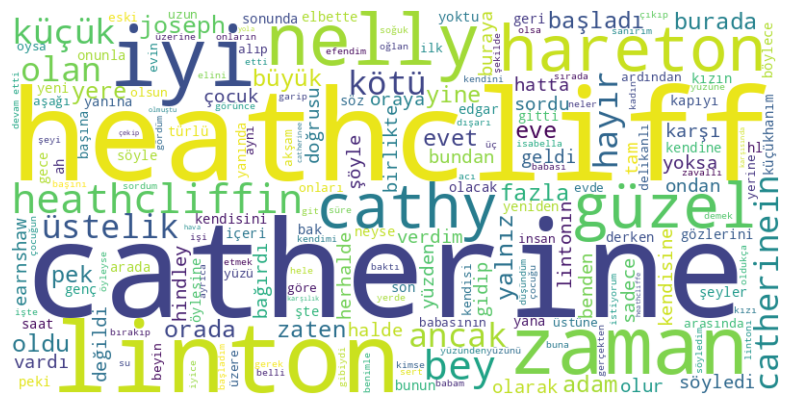

In [ ]:
# Metin verisini kullanarak WordCloud oluşturalım
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# WordCloud'u görselleştirelim
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
!pip install nltk
!pip install transformers
!pip install torch

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re

# Özetlenecek metin (kitabın tamamı)
text = book
# Metni küçük harfe dönüştürelim
text = book.lower()

# Metni cümlelere tokenize edelim
sentences = sent_tokenize(text)

# Metni kelimelere tokenize edelim
words = word_tokenize(text)

# İngilizce durma kelimelerini yükleyelim
stop_words = set(stopwords.words('turkish'))

# Durma kelimelerini kaldıralım
words = [word for word in words if word not in stop_words]

print("Temizlenmiş Kelimeler:")
print(words)


Temizlenmiş Kelimeler:
['uğultulu', 'tepeler', 'i', '1801', 'i̇nsanlardan', 'kaçan', 'komşumu', 'sonra', 'başıma', 'bir', 'sürü', 'iş', 'açacak', 'olan', 'mal', 'sahibimi', 'ziyaretten', 'yeni', 'döndüm', '.', 'doğruyu', 'söylemek', 'gerekirse', 'oraları', 'gerçekten', 'güzel', 'yerlerdi', '!', 'i̇ngiltere', '’', 'gürültüden', 'kadar', 'uzak', 'başka', 'bir', 'yer', 'olabileceğini', 'sanmıyorum', '.', 'i̇nsanlardan', 'kaçan', 'nefret', 'eden', 'adeta', 'cennet', 'bir', 'yer', '...', 'doğrusu', 'sessizliği', 'paylaşacak', 'bay', 'heathcliff', '’', 'le', 'benden', 'uygun', 'kimse', 'yoktur', '.', 'bay', 'heathcliff', 'sevimli', 'bir', 'adam', '.', 'atımın', 'üstünde', 'ona', 'doğru', 'yaklaşırken', 'simsiyah', 'gözlerinin', 'kuşkuyla', 'kısıldığını', 'fark', 'ediyordum', '.', 'kendimi', 'ona', 'tanıtırken', 'parmaklarını', 'inatçı', 'bir', 'çekingenlikle', 'yeleğinin', 'içine', 'doğru', 'kaçırdığını', 'gördüğüm', 'zaman', 'kendisine', 'karşı', 'bir', 'yakınlık', 'duyduğumun', 'farkına', 

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Kelimeleri tokenleyelim
words = word_tokenize(cleaned_text)

# Kelime frekanslarını hesaplayalım
word_freq = Counter(words)

# Frekans tablosunu sıralı bir şekilde yazdıralım
print("Frekans Tablosu:")
for i, (word, freq) in enumerate(sorted(word_freq.items(), key=lambda x: x[1], reverse=True), start=1):
    print(f"{i}. {word}: {freq}")


Görüntülenen çıkış son 5000 satıra kısaltıldı.
15014. hareketini: 1
15015. içkiye: 1
15016. taşırıyorlar: 1
15017. içiyor: 1
15018. diyorsa: 1
15019. kötülüklerinin: 1
15020. servetini: 1
15021. küfretse: 1
15022. yapsa: 1
15023. düzeltmiyordu: 1
15024. gidişi: 1
15025. gitmekteydi: 1
15026. kurtuluş: 1
15027. rahatlık: 1
15028. övünmesini: 1
15029. öğretmişti: 1
15030. edebilse: 1
15031. tohumları: 1
15032. ekecekti: 1
15033. lanetlemelerle: 1
15034. getirmekteydi: 1
15035. yaşayanların: 1
15036. yaşayışlarını: 1
15037. sanılmasın: 1
15038. dayanmaktadır: 1
15039. azını: 1
15040. gözlerimle: 1
15041. ortakçılarına: 1
15042. söylüyorlardı: 1
15043. çevirmeye: 1
15044. başlamasıyla: 1
15045. eksik: 1
15046. patırtılı: 1
15047. lemleri: 1
15048. kuramayacak: 1
15049. hikyem: 1
15050. phoenixi: 1
15051. başları: 1
15052. sarkmış: 1
15053. tuttuk: 1
15054. kayalığına: 1
15055. gitmekmiş: 1
15056. kayda: 1
15057. köpekle: 1
15058. çıkmaktaymış: 1
15059. saldırmışlar: 1
15060. sahipleri: 1
1

In [ ]:
# Cümleleri puanlarına göre sıralayalım
sorted_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)

# Puanı en yüksek 50 cümle için indeks numarası ve cümleleri gösterelim
print("Puanı En Yüksek 50 Cümle:")
for i, (sentence, score) in enumerate(sorted_sentences[:50], start=1):
    print(f"{i}. {sentence}: {score}")
    print("-------------")


Puanı En Yüksek 50 Cümle:
1. ben sadece heathcliff’in konuşmalarının seni   
ilgilendirmeyeceğini  canının sıkılacağını düşünmüştüm  o   
kadar.”   
“yoo  yo ” dedi küçükhanım gözyaşları arasında  “benim   
yanınızdan gitmemi söyledin  çünkü yanınızda bulunmak   
istediğimi biliyordun.”   
bayan linton bana dönerek  “deli mi bu çocuk?” diye   
sordu   “şimdi  dün  "konuşulanları  " kelimesi  kelimesine  
tekrarlayacağım isabella  sen de bunun neresi seni ilgilendirir    
söyleyeceksin.”   
“ben konuşulanlara aldırış etmiyordum ki ” diye cevap   
verdi kız  “ben yalnızca...”   
catherine onun sözünü tamamlamaya cesaret edemediğini   
görünce  “evet  sen yalnızca...” dedi.: 56659
-------------
2. “benim   
alçakça bir bencillikle böyle konuştuğumu düşünüyorsun    
değil mi?”   
“bundan hiç şüphem yok ” diye karşılık verdi isabella    
“sana baktıkça tüylerim diken diken oluyor!”   
diğeri  "de  " “güzel!”  diye  "bağırdı  " “madem  aklına 
koymuşsun  dene öyleyse; ben üstüme düşeni yaptı

In [ ]:
# En yüksek puan alan 10 cümleyi alalım
top_sentences = sorted_sentences[:10]

# Cümlelerin içeriğini yazdıralım
print("Ana Teması:")
for sentence, score in top_sentences:
    print(f"- {sentence.strip()}")



Ana Teması:
- ben sadece heathcliff’in konuşmalarının seni   
ilgilendirmeyeceğini  canının sıkılacağını düşünmüştüm  o   
kadar.”   
“yoo  yo ” dedi küçükhanım gözyaşları arasında  “benim   
yanınızdan gitmemi söyledin  çünkü yanınızda bulunmak   
istediğimi biliyordun.”   
bayan linton bana dönerek  “deli mi bu çocuk?” diye   
sordu   “şimdi  dün  "konuşulanları  " kelimesi  kelimesine  
tekrarlayacağım isabella  sen de bunun neresi seni ilgilendirir    
söyleyeceksin.”   
“ben konuşulanlara aldırış etmiyordum ki ” diye cevap   
verdi kız  “ben yalnızca...”   
catherine onun sözünü tamamlamaya cesaret edemediğini   
görünce  “evet  sen yalnızca...” dedi.
- “benim   
alçakça bir bencillikle böyle konuştuğumu düşünüyorsun    
değil mi?”   
“bundan hiç şüphem yok ” diye karşılık verdi isabella    
“sana baktıkça tüylerim diken diken oluyor!”   
diğeri  "de  " “güzel!”  diye  "bağırdı  " “madem  aklına 
koymuşsun  dene öyleyse; ben üstüme düşeni yaptım  bundan   
sonrasını sen bilirsin.”

In [ ]:
from textblob import TextBlob

# Metni analiz edelim
text = cleaned_text
blob = TextBlob(text)

# Duygusal tonu belirleuelim
sentiment = blob.sentiment

print(sentiment)


Sentiment(polarity=0.21953124999999996, subjectivity=0.44765625)


# Polarity (Duygusal Yoğunluk): Metnin duygusal yoğunluğunu belirler. Değer aralığı genellikle -1 ile 1 arasındadır. Pozitif bir değer, metnin pozitif bir duygusal ton taşıdığını, negatif bir değer ise negatif bir duygusal tonu işaret ettiğini gösterir. 0 ise nötr bir duygusal tonu ifade eder. Örneğin, pozitif bir metin için yaklaşık 0.5, negatif bir metin için yaklaşık -0.5 olabilir.

# Subjectivity (Öznellik): Metnin öznel olup olmadığını ifade eder. Değer aralığı genellikle 0 ile 1 arasındadır. 1'e yaklaşan değerler, metnin daha öznel olduğunu gösterirken, 0'a yaklaşan değerler daha nesnel olduğunu gösterir.

## Yorumlama;

- Polarity: 0.2195 olan metin pozitif bir duygusal ton taşıyor gibi görünüyor.

- Subjectivity: 0.4476 olan metin, 1'e yaklaşan bir değer olduğu için biraz öznel olabilir, ancak daha fazla nesnel bir ifadeye sahip diyebiliriz.